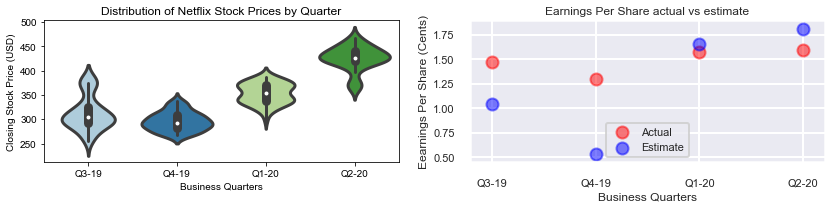

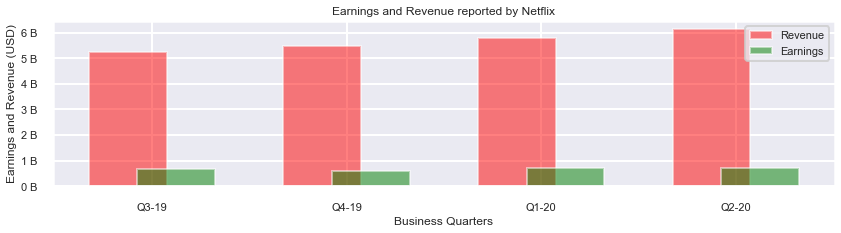

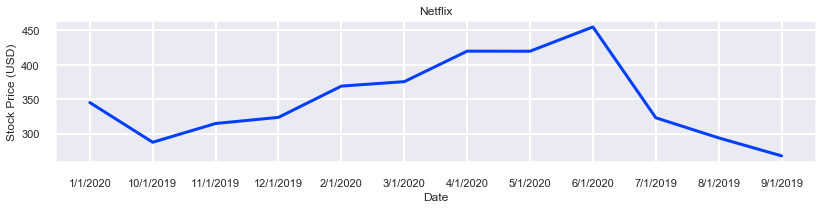

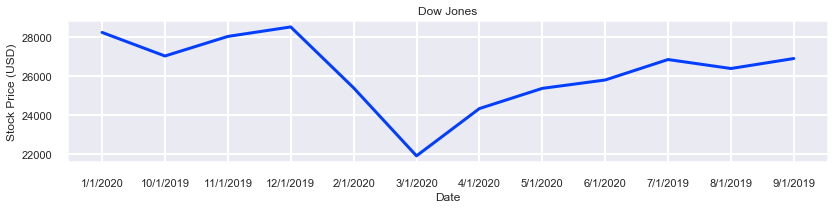

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick



#creating the dataframes and loading the csv files

netflix_stocks = pd.read_csv('NFLX(Jul19-Jun20).csv') 
dowjones_stocks = pd.read_csv('DJI(Jul19-Jun20).csv') 
netflix_stocks_quarterly = pd.read_csv('NFLX(Jul19-Jun20)_by_Quarter.csv')

#rename the column Adj Close to Price

netflix_stocks.rename(columns={'Adj Close': 'Price'},inplace=True) 
dowjones_stocks.rename(columns={'Adj Close': 'Price'},inplace=True) 
netflix_stocks_quarterly.rename(columns={'Adj Close': 'Price'},inplace=True)

#Variables

x_positions = [1, 2, 3, 4] 
chart_labels = ["Q3-19","Q4-19","Q1-20","Q2-20"] 
earnings_actual =[1.47, 1.3,1.57,1.59] 
earnings_estimate = [1.04,0.53,1.65,1.81]

#The metrics below are in billions of dollars
revenue_by_quarter = [5.24, 5.47, 5.77,6.15] 
earnings_by_quarter = [0.66524,0.58697,0.70907,0.7202] 
quarter_labels = ["Q3-19","Q4-19","Q1-20", "Q2-20"]

#Revenue
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of dataset 
d = 4 # Number of sets of bars 
w = 0.5 # Width of each bar 
bars1_x = [t*element + w*n for element
             in range(d)]

#Earnings
n = 2 # This is our second dataset (out of 2) 
t = 2 # Number of dataset 
d = 4 # Number of sets of bars 
w = 0.5 # Width of each bar 
bars2_x = [t*element + w*n for element
             in range(d)]

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)] 
labels = ["Revenue", "Earnings"]

#Violin plot for the distribution of netflix stock prices by quarter
plt.figure(figsize=(14,12))

ax = plt.subplot(4,2,1)

sns.set_style("darkgrid") 
sns.set_palette("Paired") 
sns.set_context("poster",font_scale = .5)
sns.violinplot(data=netflix_stocks_quarterly, x='Quarter',y='Price') 
ax.set_title('Distribution of Netflix Stock Prices by Quarter') 
ax.set_xlabel("Business Quarters") 
ax.set_ylabel('Closing Stock Price (USD)')

#scatter plot for EPS

ax1 = plt.subplot(4,2,2)

plt.scatter(x_positions, earnings_actual, color='red',alpha=0.5) 
plt.scatter(x_positions, earnings_estimate, color='blue',alpha=0.5) 
plt.legend(['Actual','Estimate'], loc=8) 
plt.xticks(x_positions,chart_labels) 
plt.xlabel('Business Quarters')
plt.ylabel('Eearnings Per Share (Cents)')
ax1.set_title('Earnings Per Share actual vs estimate') 
plt.subplots_adjust(wspace=.2)
plt.show()

#bar plot

plt.figure(figsize=(14,14))

ax2 = plt.subplot(4,1,3)

plt.bar(bars1_x,revenue_by_quarter,alpha=0.5, color='red') 
plt.bar(bars2_x,earnings_by_quarter,alpha=0.5, color='green') 
plt.legend(labels)
ax2.set_title("Earnings and Revenue reported by Netflix") 
plt.xticks(middle_x, quarter_labels)
plt.xlabel("Business Quarters")
plt.ylabel("Earnings and Revenue (USD)")
plt.subplots_adjust(wspace=.2)
fmt = '{x:,.0f} B'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick)
plt.show()

sns.set_palette('bright')
#Line plots 
plt.figure(figsize=(30,12))

#Left plot Netflix
ax3 = plt.subplot(4, 2, 4)

sns.set_palette('bright')

sns.lineplot(netflix_stocks['Date'], netflix_stocks['Price']) 
ax3.set_title("Netflix") 
ax3.set_xlabel("Date") 
ax3.set_ylabel("Stock Price (USD)")
plt.show()

#Right plot Dow Jones
plt.figure(figsize=(30,12))

ax4 = plt.subplot(4, 2, 5) 

sns.set_palette('bright')

sns.lineplot(dowjones_stocks['Date'], dowjones_stocks['Price']) 

ax4.set_title("Dow Jones") 
ax4.set_xlabel("Date") 
ax4.set_ylabel("Stock Price (USD)")

plt.subplots_adjust(wspace=.2)

plt.show()